In [42]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Given parameters
n_samples = 1000000  
theta_0 = 3  
theta_1 = 1  
theta_2 = 2  
noise_variance = 2  

x1 = np.random.normal(3, 2, n_samples)  # x1 ~ N(3, 4)
x2 = np.random.normal(-1, 2, n_samples)  # x2 ~ N(-1, 4)
noise = np.random.normal(0, np.sqrt(noise_variance), n_samples)  # noise ~ N(0, sqrt(2))

y = theta_0 + theta_1 * x1 + theta_2 * x2 + noise

df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': y
})

df.describe(), df.head()


(                   x1              x2               y
 count  1000000.000000  1000000.000000  1000000.000000
 mean         2.996800       -1.000487        3.996093
 std          2.000377        2.002603        4.697861
 min         -6.658872      -10.288838      -20.441885
 25%          1.645833       -2.349384        0.828045
 50%          2.998009       -0.999739        3.996875
 75%          4.346619        0.348345        7.166044
 max         12.357898        8.655245       25.654945,
          x1        x2          y
 0  3.993428 -0.661656   7.175861
 1  2.723471 -1.243010   2.534992
 2  4.295377  1.313251  10.104680
 3  6.046060 -0.599828   5.753800
 4  2.531693  0.729221   6.551946)

In [43]:
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def stochastic_gradient_descent(X, y, lr=0.001, batch_sizes=[1], epochs=10000, tol=1e-9):
    m, n = X.shape  # Number of samples and features
    results = {}  # Dictionary to store results for different batch sizes
    
    for batch_size in batch_sizes:
        theta = np.zeros(n)
        loss_history = [] 
        theta_history = []
        num_batches = m // batch_size
        
        
        
        print(f"Running SGD for batch size = {batch_size}...")
        
        for epoch in range(epochs):
            # Shuffle data initially
            shuffle_idx = np.random.permutation(m)
            X_shuffled, y_shuffled = X[shuffle_idx], y[shuffle_idx]
            for b in range(num_batches):
                theta_history.append(theta.copy())
                
                start_idx = b * batch_size
                end_idx = start_idx + batch_size
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                
                y_pred = X_batch.dot(theta)
                gradient = -2 * X_batch.T.dot(y_batch - y_pred) / batch_size
                
                theta -= lr * gradient
                
            y_pred_epoch = X.dot(theta)
            loss = compute_loss(y, y_pred_epoch)
            loss_history.append(loss)
            
            if epoch > 1 and abs(loss_history[-1] - loss_history[-2]) < tol and abs(loss_history[-2] - loss_history[-3]) < tol:
                print(f"Converged at epoch {epoch} for batch size = {batch_size}")
                break
        
        results[batch_size] = {
            'theta': theta,
            'loss_history': loss_history,
            'theta_history': theta_history,
            'epochs': epoch + 1  # +1 because epoch is 0-indexed
        }
        
    return results

X = np.c_[np.ones(n_samples), df[['x1', 'x2']].values]
y = df['y'].values

batch_sizes_to_try = [1, 100, 10000, 1000000]

sgd_results = stochastic_gradient_descent(X, y, batch_sizes=batch_sizes_to_try)

learned_thetas = {batch_size: res['theta'] for batch_size, res in sgd_results.items()}
learned_thetas


Running SGD for batch size = 1...
Converged at epoch 2 for batch size = 1
Running SGD for batch size = 100...
Converged at epoch 4 for batch size = 100
Running SGD for batch size = 10000...
Converged at epoch 175 for batch size = 10000
Running SGD for batch size = 1000000...


{1: array([2.96104208, 0.9928375 , 2.02408767]),
 100: array([3.00006735, 1.00003645, 1.99948716]),
 10000: array([3.00346594, 0.9998375 , 2.00067572]),
 1000000: array([2.99137043, 1.00196525, 2.00027757])}

In [44]:
test_df = pd.read_csv('../data/q2/q2test.csv')

X_test = np.c_[np.ones(test_df.shape[0]), test_df[['X_1', 'X_2']].values]
y_test = test_df['Y'].values

def compute_test_error(X, y, theta):
    y_pred = X.dot(theta)
    return compute_loss(y, y_pred)

test_errors = {}
for batch_size, result in sgd_results.items():
    theta = result['theta']
    test_error = compute_test_error(X_test, y_test, theta)
    test_errors[batch_size] = test_error

original_theta = np.array([theta_0, theta_1, theta_2])
original_test_error = compute_test_error(X_test, y_test, original_theta)

test_errors, original_test_error


({1: 2.0297869509946977,
  100: 1.96605662332893,
  10000: 1.9657407052350244,
  1000000: 1.9661170362516158},
 1.965893843)

In [45]:
result['theta_history']

[array([0., 0., 0.]),
 array([0.00799219, 0.03196305, 0.0080621 ]),
 array([0.01579295, 0.06309658, 0.01625082]),
 array([0.02340789, 0.09342402, 0.02455954]),
 array([0.03084246, 0.12296815, 0.03298187]),
 array([0.03810193, 0.15175106, 0.0415116 ]),
 array([0.04519144, 0.17979421, 0.05014276]),
 array([0.05211597, 0.20711843, 0.05886956]),
 array([0.05888033, 0.23374395, 0.06768639]),
 array([0.06548923, 0.25969041, 0.07658786]),
 array([0.07194721, 0.28497689, 0.08556874]),
 array([0.07825868, 0.30962189, 0.09462398]),
 array([0.08442794, 0.33364341, 0.10374869]),
 array([0.09045915, 0.35705888, 0.11293817]),
 array([0.09635633, 0.37988527, 0.12218785]),
 array([0.10212342, 0.40213904, 0.13149333]),
 array([0.10776421, 0.42383616, 0.14085038]),
 array([0.1132824 , 0.44499216, 0.15025488]),
 array([0.11868158, 0.46562211, 0.15970287]),
 array([0.12396521, 0.48574063, 0.16919053]),
 array([0.12913667, 0.50536194, 0.17871416]),
 array([0.13419925, 0.52449983, 0.18827021]),
 array([0.13

In [46]:
result['theta_history'] = np.array(result['theta_history'])

In [47]:
result['theta_history'].shape

(10000, 3)

In [48]:
sgd_results[1]['theta_history']

[array([0., 0., 0.]),
 array([0.01377454, 0.08486292, 0.0066042 ]),
 array([ 0.02108695,  0.11983531, -0.0016172 ]),
 array([0.03887787, 0.20299095, 0.00656219]),
 array([0.04582381, 0.22989136, 0.00180868]),
 array([ 0.05111252,  0.24630541, -0.00187431]),
 array([0.04257666, 0.23960979, 0.02428424]),
 array([0.04103218, 0.23643441, 0.02731443]),
 array([0.03560675, 0.21435094, 0.05669862]),
 array([0.03538516, 0.21402584, 0.05675627]),
 array([0.05850271, 0.31471125, 0.11344818]),
 array([0.05883398, 0.31597626, 0.1130767 ]),
 array([0.07382328, 0.35802844, 0.13896873]),
 array([0.07349973, 0.35729049, 0.13914748]),
 array([0.09289007, 0.44484089, 0.1742969 ]),
 array([0.09333538, 0.44623777, 0.17321226]),
 array([0.10643254, 0.51436032, 0.17425298]),
 array([0.12529124, 0.61257353, 0.20888422]),
 array([0.12903134, 0.62234141, 0.20254491]),
 array([0.13228798, 0.64018757, 0.19764712]),
 array([0.13600645, 0.6591153 , 0.18521473]),
 array([0.14047535, 0.65847894, 0.18047587]),
 array

In [53]:
sgd_results[1]['theta_history'][::100000]

[array([0., 0., 0.]),
 array([2.96068364, 1.00567899, 1.92102766]),
 array([2.96544151, 1.06188121, 2.00971086]),
 array([3.05955052, 1.05446547, 1.97750049]),
 array([3.0217539 , 0.94430241, 1.97027503]),
 array([3.00440741, 1.03398583, 2.01678278]),
 array([2.97105177, 0.94248232, 2.00771211]),
 array([3.00587753, 0.94283622, 2.00369859]),
 array([3.03068156, 1.02310498, 1.95874815]),
 array([3.11167259, 0.9748004 , 2.02856705]),
 array([2.96104208, 0.9928375 , 2.02408767]),
 array([2.96068364, 1.00567899, 1.92102766]),
 array([2.96544151, 1.06188121, 2.00971086]),
 array([3.05955052, 1.05446547, 1.97750049]),
 array([3.0217539 , 0.94430241, 1.97027503]),
 array([3.00440741, 1.03398583, 2.01678278]),
 array([2.97105177, 0.94248232, 2.00771211]),
 array([3.00587753, 0.94283622, 2.00369859]),
 array([3.03068156, 1.02310498, 1.95874815]),
 array([3.11167259, 0.9748004 , 2.02856705]),
 array([2.96104208, 0.9928375 , 2.02408767]),
 array([2.96068364, 1.00567899, 1.92102766]),
 array([2.96

In [82]:
print(len(np.array(sgd_results[1]['theta_history'][::1000])))
print(len(np.array(sgd_results[100]['theta_history'][::1000])))
print(len(np.array(sgd_results[10000]['theta_history'][::1000])))
print(len(np.array(sgd_results[1000000]['theta_history'][::1000])))


3000
50
18
10


In [78]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

# # Function to visualize 3D movement of a single theta_history
# def visualize_single_theta_3D(theta_history):
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
# 
#     # Set labels
#     ax.set_xlabel('Theta 0')
#     ax.set_ylabel('Theta 1')
#     ax.set_zlabel('Theta 2')
# 
#     line, = ax.plot([], [], [])
#     point, = ax.plot([], [], [], 'o')
# 
#     # Initialize line and point
#     def init():
#         line.set_data([], [])
#         line.set_3d_properties([])
#         point.set_data([], [])
#         point.set_3d_properties([])
#         return line, point
# 
#     # Update function for animation
#     def update(frame):
#         line.set_data(theta_history[:frame+1, 0], theta_history[:frame+1, 1])
#         line.set_3d_properties(theta_history[:frame+1, 2])
#         point.set_data(theta_history[frame, 0], theta_history[frame, 1])
#         point.set_3d_properties(theta_history[frame, 2])
#         return line, point
#     print(len(theta_history))
#     ani = animation.FuncAnimation(fig, update, frames=len(theta_history), init_func=init, interval=0.2*1000)
#     ani.save('single_3D_trajectory_line.gif', writer=PillowWriter(fps=5))
#     plt.show()
# 
# # Replace with your actual theta_history
# # For demonstration, I'm using random data
# dummy_theta_history = np.random.randn(50, 3)  # Replace with your theta_history
# dummy_theta_history = np.array(sgd_results[1]['theta_history'][::60000])
# print(dummy_theta_history)
# 
# # visualize_single_theta_3D(np.array(sgd_results[1]['theta_history'][::60000]))
# visualize_single_theta_3D(dummy_theta_history)

def visualize_single_theta_3D(theta_history, filename):
    print("size of theta history is", len(theta_history))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Set labels
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    ax.set_zlabel('Theta 2')

    # Set the axes limits based on the min and max values of theta_history
    ax.set_xlim(np.min(theta_history[:, 0]), np.max(theta_history[:, 0]))
    ax.set_ylim(np.min(theta_history[:, 1]), np.max(theta_history[:, 1]))
    ax.set_zlim(np.min(theta_history[:, 2]), np.max(theta_history[:, 2]))

    line, = ax.plot([], [], [])
    point, = ax.plot([], [], [], 'o')

    # Initialize line and point
    def init():
        line.set_data([], [])
        line.set_3d_properties([])
        point.set_data([], [])
        point.set_3d_properties([])
        return line, point

    # Update function for animation
    def update(frame):
        line.set_data(theta_history[:frame+1, 0], theta_history[:frame+1, 1])
        line.set_3d_properties(theta_history[:frame+1, 2])
        point.set_data(theta_history[frame, 0], theta_history[frame, 1])
        point.set_3d_properties(theta_history[frame, 2])
        return line, point

    ani = animation.FuncAnimation(fig, update, frames=len(theta_history), init_func=init, interval=0.2*1000)
    ani.save('3D_trajectory_line'+filename+'.gif', writer=PillowWriter(fps=5))
    plt.show()

# Replace with your actual theta_history
# For demonstration, I'm using random data
# dummy_theta_history = np.random.randn(50, 3)  # Replace with your theta_history
# 
# visualize_single_theta_3D(np.array(sgd_results[1]['theta_history'][::60000]))


size of theta history is 10


/var/folders/cx/8v11zwh97cxgdgt_ph13_56r0000gn/T/ipykernel_6901/3969567656.py:79: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(theta_history[frame, 0], theta_history[frame, 1])


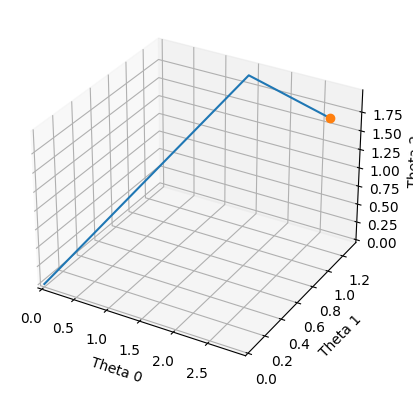

size of theta history is 18


/var/folders/cx/8v11zwh97cxgdgt_ph13_56r0000gn/T/ipykernel_6901/3969567656.py:79: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(theta_history[frame, 0], theta_history[frame, 1])


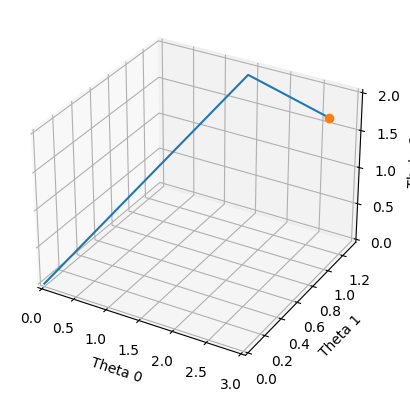

size of theta history is 50


/var/folders/cx/8v11zwh97cxgdgt_ph13_56r0000gn/T/ipykernel_6901/3969567656.py:79: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(theta_history[frame, 0], theta_history[frame, 1])


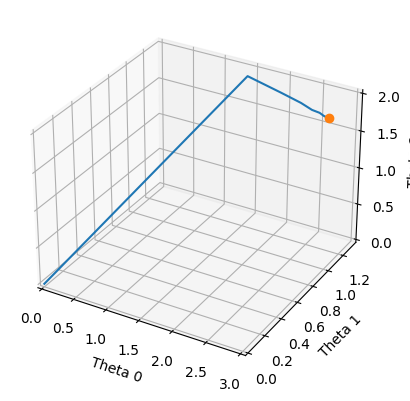

size of theta history is 3000


/var/folders/cx/8v11zwh97cxgdgt_ph13_56r0000gn/T/ipykernel_6901/3969567656.py:79: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(theta_history[frame, 0], theta_history[frame, 1])


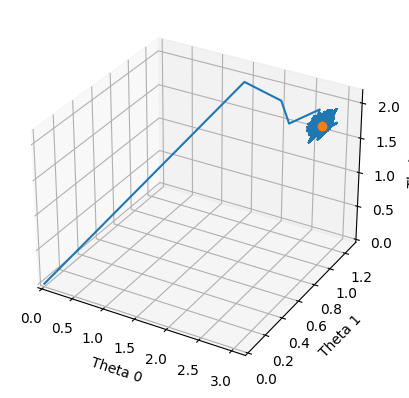

In [81]:
for batch_sz in batch_sizes_to_try[::-1]:
   visualize_single_theta_3D(np.array(sgd_results[batch_sz]['theta_history'][::1000]), 
                             "batch size_" + str(batch_sz)) 